## Advanced NBA Statistics Capstone
# 4. Pre-Processing & Feature Engineering

In [1]:
#loading packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/post_EDA_data.csv')

In [3]:
df.head()

,Player,TEAM,College,Country,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,cluster_five,cluster_ten,cluster_fourteen
0,Aaron Gordon,ORL,Arizona,USA,11.3,10.9,22,32.9,58,19,39,17.6,6.5,33.6,2.7,69.8,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,81.0,220,4,7.0,93.0,85.2,23.9,33.5,0.7,61.1,6.0,40.2,32.5,0.2,2.7,6.6,1.9,1.4,42.9,57.1,0.07,4.7,1.8,3.2,66.7,0.2,20.0,0.4,35.7,0.5,29.8,14.4,63.2,2.3,37.1,2.2,42.4,2.5,42.4,3.7,40.3,3.8,33.9,108.3,-2.0,11.1,4.4,19.1,50.0,53.0,23.8,100.43,1,2,1
1,Abdel Nader,BOS,Iowa State,Egypt,3.3,6.6,24,10.9,48,33,15,3.0,1.0,35.4,0.5,59.0,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,78.0,230,58,17.5,82.5,92.0,12.0,29.6,0.2,62.3,7.0,8.7,9.1,0.1,0.7,8.6,0.3,0.7,38.9,61.1,0.00,1.5,1.3,0.4,40.4,0.1,20.0,0.0,20.0,0.0,0.0,4.2,59.8,0.5,26.8,0.6,41.9,0.8,42.2,1.3,43.1,1.7,39.8,107.3,-10.3,7.8,2.4,11.1,41.3,43.9,16.2,100.46,0,6,7
2,Al Horford,BOS,Florida,Dominican Rep...,13.4,13.4,32,31.6,72,47,25,12.9,5.1,42.9,1.3,78.3,1.8,0.6,1.1,1.9,32.0,15,0,4.8,82.0,245,3,7.3,92.7,90.4,33.3,33.9,0.6,60.6,6.4,48.9,42.9,0.3,5.1,10.4,6.5,1.3,52.6,47.4,0.00,8.8,3.5,1.9,67.5,0.8,40.7,0.5,37.3,0.4,49.2,11.5,59.8,1.8,33.9,1.8,36.0,2.4,35.7,3.4,41.2,3.5,29.8,101.6,7.3,22.5,4.7,17.8,55.3,57.5,18.3,97.23,1,2,12
3,Al-Farouq Aminu,POR,Wake Forest,USA,9.0,9.7,27,30.0,69,40,29,9.3,3.3,36.9,0.9,73.8,1.1,1.1,0.6,2.0,24.3,9,0,3.2,81.0,220,8,16.2,83.8,88.5,40.5,29.1,0.7,62.4,5.9,25.0,19.1,0.2,1.6,6.3,3.5,2.2,42.4,57.6,0.00,5.7,3.0,1.2,58.9,0.2,24.5,0.0,16.7,0.0,11.1,10.3,54.1,2.3,43.3,2.1,38.5,2.6,43.6,3.5,39.5,3.4,36.8,104.4,5.2,5.6,4.5,19.8,50.3,52.2,14.5,98.47,3,4,13
4,Alan Williams,PHX,California-Santa Barbara,USA,8.9,27.4,25,14.1,5,1,4,4.0,1.4,0.0,1.2,66.7,1.4,1.0,0.2,2.6,13.9,0,0,0.2,80.0,265,61,11.8,88.2,87.5,37.5,27.3,0.0,45.8,4.0,17.6,15.6,0.0,2.0,11.4,4.0,1.0,0.0,100.0,0.00,1.2,1.0,0.8,57.1,0.6,37.5,0.0,0.0,0.0,0.0,4.2,44.7,1.0,45.5,0.8,50.0,0.8,36.4,1.2,54.5,1.4,26.9,90.8,0.1,19.5,3.9,26.0,38.9,45.5,18.4,97.25,0,6,6


In [4]:
# re-examining dataframe
print('Number of players:', df.shape[0], 'Number of features:', df.shape[1])

Number of players: 399 Number of features: 79


#### Through model experimentation,  player's Team, College , Country,  and Clusters of 10  and 14 had little impact on predicting the Player Impact Estimate (PIE) metric in the 2018-2019 season.  We will drop these columns from future analysis.

In [5]:
# dropping columns with low impact on target variable.

df2 = df.drop(columns=['Player','College', 'Country', 'TEAM', 'cluster_ten','cluster_fourteen'])

### Creating Dummy Variables for Categorical Variables

In [6]:
#creating dummy variables for clusters.

df2 = pd.get_dummies(df2, columns=['cluster_five'], drop_first=True)

In [7]:
print(df.shape)
df2.head()

(399, 79)


,PIE_2017,PIE_2018,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,cluster_five_1,cluster_five_2,cluster_five_3,cluster_five_4
0,11.3,10.9,22,32.9,58,19,39,17.6,6.5,33.6,2.7,69.8,1.8,1.0,0.8,1.9,34.1,17,0,-1.6,81.0,220,4,7.0,93.0,85.2,23.9,33.5,0.7,61.1,6.0,40.2,32.5,0.2,2.7,6.6,1.9,1.4,42.9,57.1,0.07,4.7,1.8,3.2,66.7,0.2,20.0,0.4,35.7,0.5,29.8,14.4,63.2,2.3,37.1,2.2,42.4,2.5,42.4,3.7,40.3,3.8,33.9,108.3,-2.0,11.1,4.4,19.1,50.0,53.0,23.8,100.43,1,0,0,0
1,3.3,6.6,24,10.9,48,33,15,3.0,1.0,35.4,0.5,59.0,0.7,0.3,0.2,0.9,6.5,0,0,-2.3,78.0,230,58,17.5,82.5,92.0,12.0,29.6,0.2,62.3,7.0,8.7,9.1,0.1,0.7,8.6,0.3,0.7,38.9,61.1,0.00,1.5,1.3,0.4,40.4,0.1,20.0,0.0,20.0,0.0,0.0,4.2,59.8,0.5,26.8,0.6,41.9,0.8,42.2,1.3,43.1,1.7,39.8,107.3,-10.3,7.8,2.4,11.1,41.3,43.9,16.2,100.46,0,0,0,0
2,13.4,13.4,32,31.6,72,47,25,12.9,5.1,42.9,1.3,78.3,1.8,0.6,1.1,1.9,32.0,15,0,4.8,82.0,245,3,7.3,92.7,90.4,33.3,33.9,0.6,60.6,6.4,48.9,42.9,0.3,5.1,10.4,6.5,1.3,52.6,47.4,0.00,8.8,3.5,1.9,67.5,0.8,40.7,0.5,37.3,0.4,49.2,11.5,59.8,1.8,33.9,1.8,36.0,2.4,35.7,3.4,41.2,3.5,29.8,101.6,7.3,22.5,4.7,17.8,55.3,57.5,18.3,97.23,1,0,0,0
3,9.0,9.7,27,30.0,69,40,29,9.3,3.3,36.9,0.9,73.8,1.1,1.1,0.6,2.0,24.3,9,0,3.2,81.0,220,8,16.2,83.8,88.5,40.5,29.1,0.7,62.4,5.9,25.0,19.1,0.2,1.6,6.3,3.5,2.2,42.4,57.6,0.00,5.7,3.0,1.2,58.9,0.2,24.5,0.0,16.7,0.0,11.1,10.3,54.1,2.3,43.3,2.1,38.5,2.6,43.6,3.5,39.5,3.4,36.8,104.4,5.2,5.6,4.5,19.8,50.3,52.2,14.5,98.47,0,0,1,0
4,8.9,27.4,25,14.1,5,1,4,4.0,1.4,0.0,1.2,66.7,1.4,1.0,0.2,2.6,13.9,0,0,0.2,80.0,265,61,11.8,88.2,87.5,37.5,27.3,0.0,45.8,4.0,17.6,15.6,0.0,2.0,11.4,4.0,1.0,0.0,100.0,0.00,1.2,1.0,0.8,57.1,0.6,37.5,0.0,0.0,0.0,0.0,4.2,44.7,1.0,45.5,0.8,50.0,0.8,36.4,1.2,54.5,1.4,26.9,90.8,0.1,19.5,3.9,26.0,38.9,45.5,18.4,97.25,0,0,0,0


### Analyzing Distribution Explanatory Variables for Normality/skewness

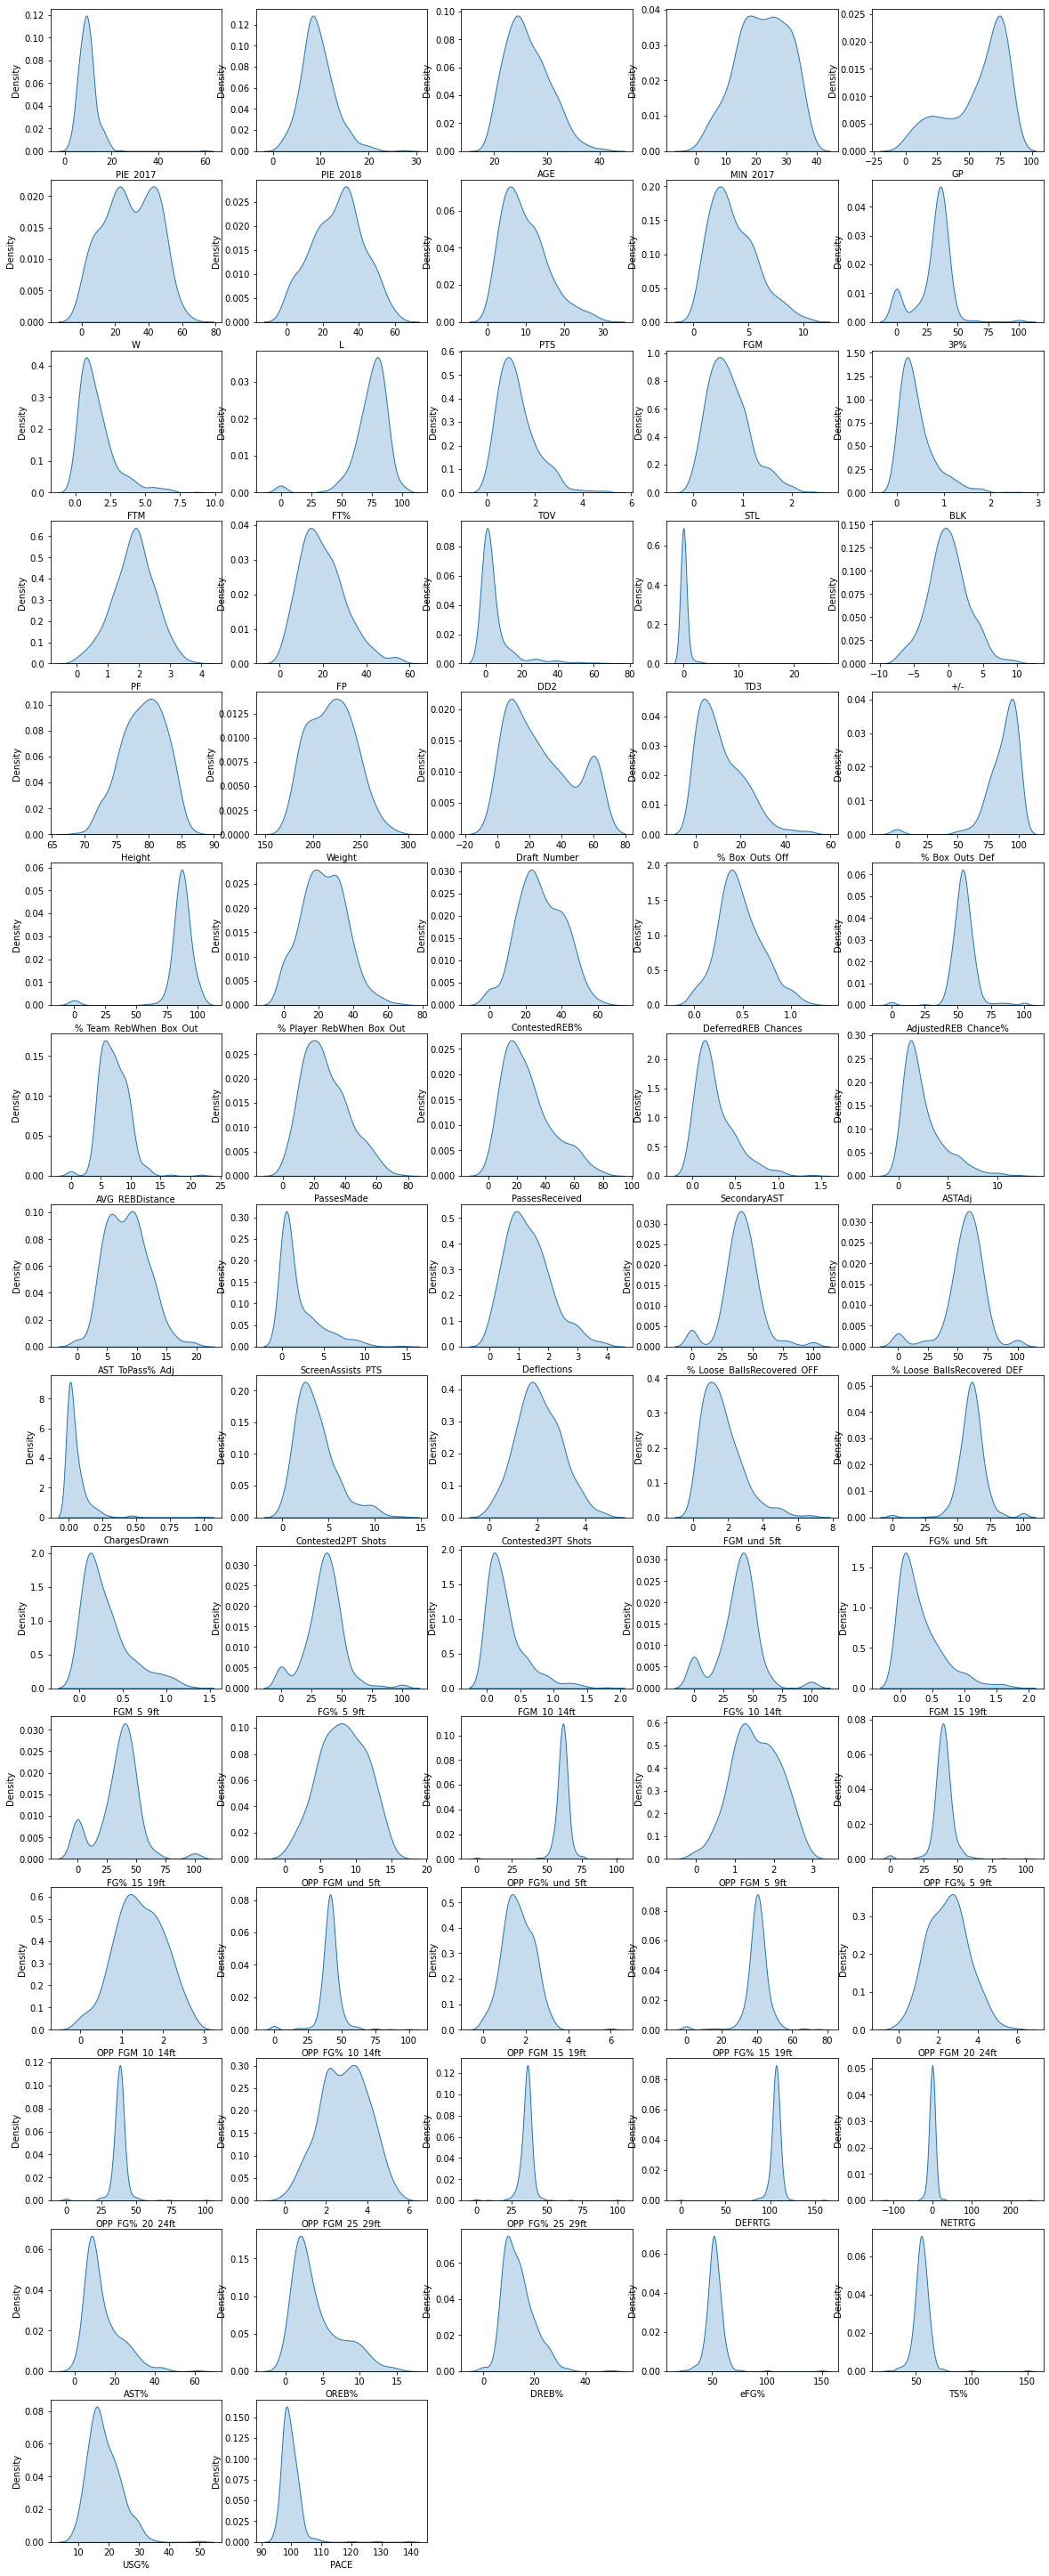

In [8]:
# analyzing the probability density function distributions of all numeric variables

plt.figure(figsize=(20,70))

for i in range(72):
    plt.subplot(20,5,i+1)
    sns.kdeplot(df2.iloc[:,i], shade=True)
    
plt.show()    
# Note: the graph of TD3 looks like it has an error, but represents Triple Doubles, which are uncommon.

### Stablizing Variance with Yeo-Johnson Power Transformation

In [9]:
# Removing the Response Variable so as not to alter it through transformatiions

response_variable = df.PIE_2018
df2 = df2.drop(columns='PIE_2018')

In [10]:
from scipy.stats import yeojohnson

"""
Using the Yeo-Johnson Transformation as it can handle negative values
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
"""

yeoj = df2.copy()

for i in range(70):
    yeoj.iloc[:,i] = yeojohnson(yeoj.iloc[:,i])[0]

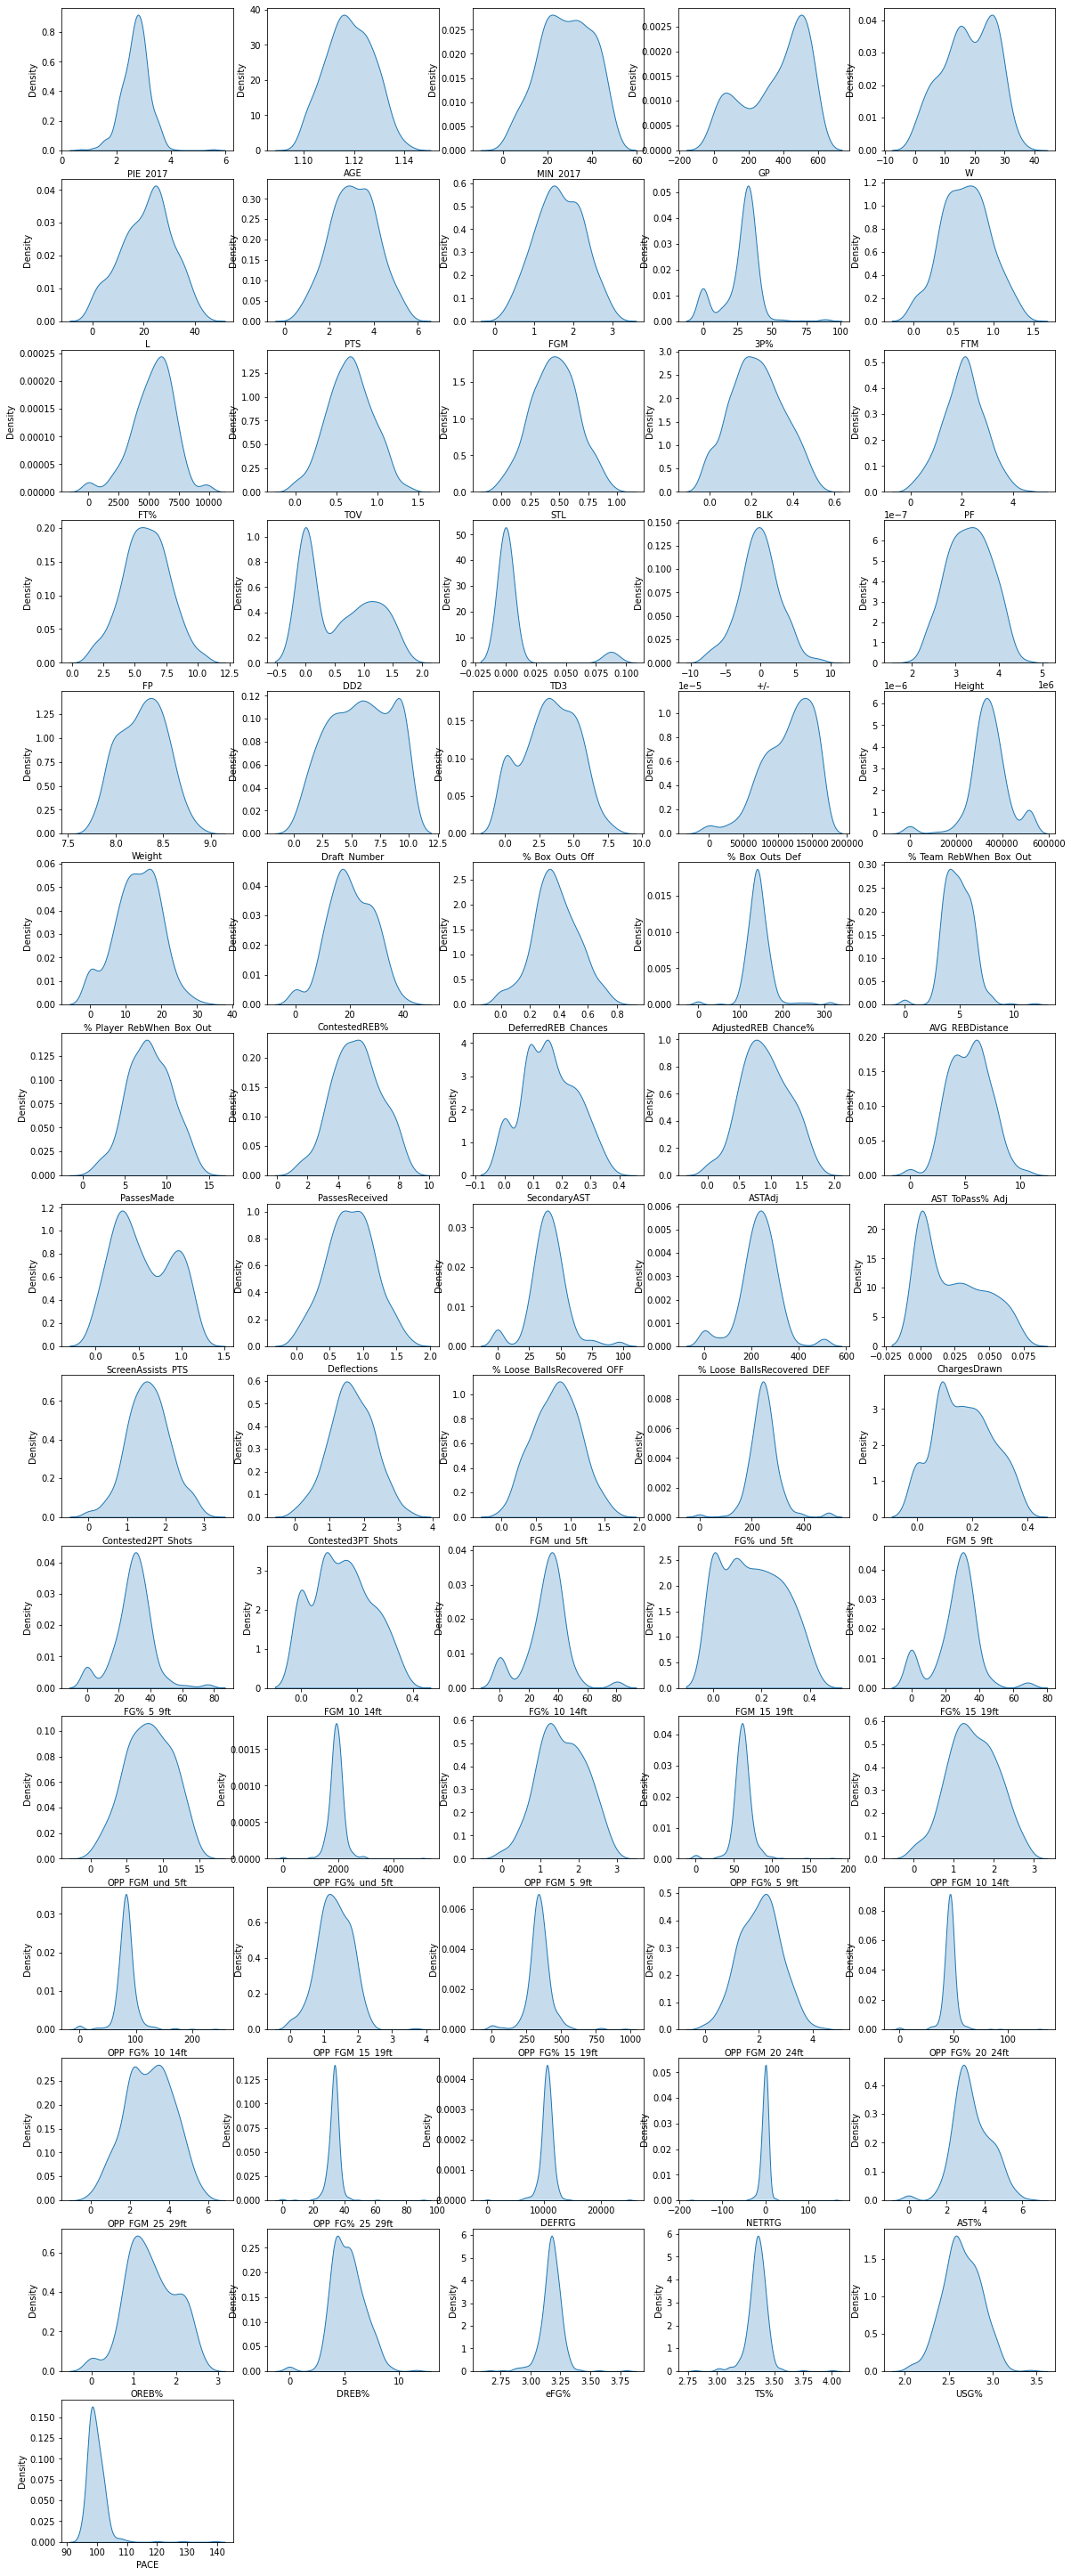

In [11]:
plt.figure(figsize=(20,70))

for i in range(71):
    plt.subplot(20,5,i+1)
    sns.kdeplot(yeoj.iloc[:,i], shade=True)

plt.show()  

### Normalizing & Standardizing the Dataframe for More Accurate Model Performance

In [12]:
# setting the mean=0, and standard deviation=1

yeoj_norm = StandardScaler().fit_transform(yeoj)

#rebuilding dataframe with column names
df3 = pd.DataFrame(yeoj_norm, columns=[df2.columns])

#re-inserting unscaled target variable and player's names for future contextual reference
df3.insert(0,'Player',df.Player)
df3.insert(1, 'PIE_2018', response_variable)

In [13]:
df3.head()

,Player,PIE_2018,PIE_2017,AGE,MIN_2017,GP,W,L,PTS,FGM,3P%,FTM,FT%,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,Height,Weight,Draft_Number,%_Box_Outs_Off,%_Box_Outs_Def,%_Team_RebWhen_Box_Out,%_Player_RebWhen_Box_Out,ContestedREB%,DeferredREB_Chances,AdjustedREB_Chance%,AVG_REBDistance,PassesMade,PassesReceived,SecondaryAST,ASTAdj,AST_ToPass%_Adj,ScreenAssists_PTS,Deflections,%_Loose_BallsRecovered_OFF,%_Loose_BallsRecovered_DEF,ChargesDrawn,Contested2PT_Shots,Contested3PT_Shots,FGM_und_5ft,FG%_und_5ft,FGM_5_9ft,FG%_5_9ft,FGM_10_14ft,FG%_10_14ft,FGM_15_19ft,FG%_15_19ft,OPP_FGM_und_5ft,OPP_FG%_und_5ft,OPP_FGM_5_9ft,OPP_FG%_5_9ft,OPP_FGM_10_14ft,OPP_FG%_10_14ft,OPP_FGM_15_19ft,OPP_FG%_15_19ft,OPP_FGM_20_24ft,OPP_FG%_20_24ft,OPP_FGM_25_29ft,OPP_FG%_25_29ft,DEFRTG,NETRTG,AST%,OREB%,DREB%,eFG%,TS%,USG%,PACE,cluster_five_1,cluster_five_2,cluster_five_3,cluster_five_4
0,Aaron Gordon,10.9,0.584828,-1.143002,1.316754,-0.097640,-0.590935,0.760899,1.269168,1.292411,0.222524,1.091190,-0.475985,0.833149,0.781209,1.171129,0.095138,1.292614,1.504622,-0.285133,-0.501247,0.534670,0.071346,-1.368290,-0.166183,0.438563,-0.267094,0.132715,0.432630,1.021697,0.737197,-0.468996,0.932913,0.500361,-0.066395,0.471447,-0.448659,0.574806,0.268502,0.123948,-0.024000,0.876953,0.665584,-0.243491,1.295927,0.606304,-0.170261,-0.991620,0.797554,-0.095648,0.894197,-0.259874,1.880960,0.364954,1.249472,-0.302905,1.296342,0.075982,1.156800,0.295255,1.144227,0.330568,0.807395,-0.308855,0.316152,-0.041749,-0.104794,0.393282,0.917322,-0.205608,-0.241691,1.036662,0.193060,1.631119,-0.050125,-0.953463,-0.14304
1,Abdel Nader,6.6,-2.244676,-0.505529,-1.319105,-0.564023,0.311443,-0.937439,-1.365481,-1.510848,0.340871,-0.959423,-1.255379,-0.640302,-1.054433,-0.559061,-1.374838,-1.488761,-0.961830,-0.285133,-0.759263,-0.392470,0.476743,1.300389,0.771398,-0.583922,0.697652,-0.823635,0.133036,-1.249298,0.871701,-0.028926,-1.461553,-1.245383,-0.754040,-1.116724,0.131965,-0.928949,-0.762464,-0.133073,0.247328,-1.016576,-1.076799,-0.814219,-1.416360,-1.915182,-0.800997,-0.991620,-1.434773,-0.977402,-1.304460,-2.039080,-1.210797,-0.299905,-1.718616,-1.574813,-1.416622,0.015511,-1.213846,0.262510,-1.165006,0.786946,-1.043498,0.719301,0.156599,-0.744308,-0.620049,-0.359935,-0.369932,-1.542321,-1.676184,-0.340679,0.201373,-0.613076,-0.050125,-0.953463,-0.14304
2,Al Horford,13.4,1.046042,1.323023,1.154153,0.629180,1.146900,-0.208727,0.684132,0.809126,0.832006,0.118006,0.243228,0.833149,-0.133483,1.573456,0.095138,1.143551,1.462908,-0.285133,1.600125,0.864997,1.057697,-1.512332,-0.129970,0.406248,0.456757,0.812270,0.463107,0.625699,0.681385,-0.290990,1.394200,0.982041,0.455191,1.311874,0.625138,1.535828,0.139787,0.746304,-0.648719,-1.016576,1.903576,1.486655,0.453549,0.690697,1.589358,0.327111,1.066743,-0.007264,0.639507,0.763151,1.005593,-0.299905,0.420569,-0.704657,0.611723,-0.685157,1.032568,-0.742375,0.875849,0.477033,0.540439,-1.025906,-0.720915,0.563998,1.080923,0.480478,0.729424,0.489319,0.372852,0.096764,-0.693721,1.631119,-0.050125,-0.953463,-0.14304
3,Al-Farouq Aminu,9.7,-0.005714,0.292537,0.954962,0.466548,0.735664,0.073214,0.127425,0.031018,0.439345,-0.337394,-0.149267,0.009075,0.971442,0.784401,0.248244,0.543840,1.266268,-0.285133,1.105702,0.534670,0.071346,-0.928652,0.679795,-0.469119,0.181950,1.303723,0.094287,1.021697,0.882944,-0.513936,-0.016086,-0.315681,-0.066395,-0.202976,-0.539355,1.099700,1.149621,0.091833,0.009493,-1.016576,1.026894,1.004480,-0.220865,-0.194169,-0.170261,-0.698818,-1.434773,-1.167106,-1.304460,-1.317136,0.642683,-1.333526,1.249472,0.490362,1.124858,-0.391235,1.279619,0.493975,0.965808,0.200565,0.451618,0.197020,-0.296635,0.439992,-1.058085,0.422894,1.015865,-0.164160,-0.356793,-0.738953,-0.350094,-0.613076,-0.050125,1.048809,-0.14304
4,Alan Williams,27.4,-0.033953,-0.220725,-0.955068,-1.921817,-1.997404,-1.808090,-1.046233,-1.162613,-2.055496,0.015609,-0.714960,0.399907,0.781209,-0.559061,1.186654,-0.469268,-0.961830,-0.285133,0.136784,0.215134,1.787129,1.38199

### Pre-Processing Complete, Next Step: Modelling



In [14]:
df3.to_csv('data/pre_processed_data.csv', index = False)